<a href="https://colab.research.google.com/github/zhaixuejun1993/LinearRegression-Study/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 计算所有points的误差
def compute_error_for_line_given_points(b, m, points):
  totalError = 0
  for i in range(0, len(points)):
    x = points[i, 0]
    y = points[i, 1]
    totalError += (y - (m * x + b))**2
  return totalError / float(len(points))

In [2]:
# 计算当前w和b的取值下所有点在b和w的导数和并取均值，返回更新后的w和b
def step_gradient(b_current, w_current, points, learningRate):
  b_gradient = 0
  w_gradient = 0
  N = float(len(points))
  for i in range(0, len(points)):
    x = points[i, 0]
    y = points[i, 1]
    b_gradient += -(2/N) * (y - (w_current * x + b_current))
    w_gradient += -(2/N) * x * (y - (w_current * x + b_current))
  new_b = b_current - (learningRate * b_gradient)
  new_w = w_current - (learningRate * w_gradient)
  return [new_b, new_w]

In [3]:
# 迭代num_iterations次 计算w和b
def gradient_descent_runner(points, starting_b, starting_w, learning_rate, num_iterations):
  b = starting_b
  w = starting_w
  for i in range(num_iterations):
    b, w = step_gradient(b, w, np.array(points), learning_rate)
  return [b, w]

Saving data.csv to data (1).csv
User uploaded file "data (1).csv" with length 373901 bytes


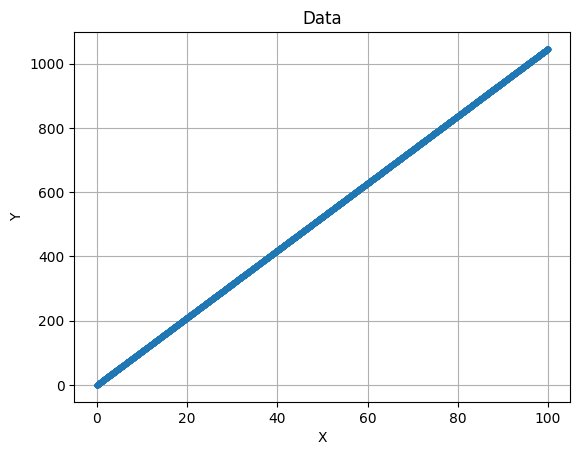

In [5]:
# data from https://github.com/LCL121/start-leanring-pytorch
# upload data & show the distribution
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

points = np.genfromtxt("data.csv", delimiter=",")
plt.plot(points[:, 0], points[:, 1], marker='.')
plt.title('Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [6]:
# processing the whole linear regression & return the new w and b
def run():
  points = np.genfromtxt("data.csv", delimiter=",")
  learniing_rate = 0.0001
  initial_b = 0
  initial_w = 0
  num_iterations = 1000
  print("Start gradient descent at b = {0}, w = {1}, error = {2}".format(initial_b, initial_w, compute_error_for_line_given_points(initial_b, initial_w, points)))

  [b, w] = gradient_descent_runner(points, initial_b, initial_w, learniing_rate, num_iterations)
  print("After {0} gradient descent at b = {1}, w = {2}, error = {3}".format(num_iterations, b, w, compute_error_for_line_given_points(b, w, points)))
  return b, w


Start gradient descent at b = 0, w = 0, error = 357633.1023481023
After 1000 gradient descent at b = 0.16403614010496098, w = 10.458163174763754, error = 0.003972589109287723


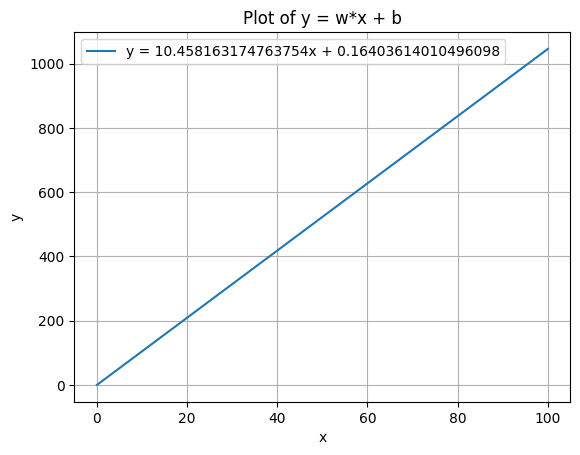

In [7]:
import matplotlib.pyplot as plt
if __name__ == '__main__':
  b_f, w_f = run()
# Generate x values
  x = np.linspace(0, 100, 400)  # Creates 400 points between -10 and 10

# Calculate corresponding y values
  y = w_f*x + b_f

# Create the plot
  plt.plot(x, y, label=f'y = {w_f}x + {b_f}')

# Add labels and title
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Plot of y = w*x + b')

# Add a legend
  plt.legend()

# Add grid lines
  plt.grid(True)

# Show the plot
  plt.show()